In [70]:
 # Data Science Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression/Modelling libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [71]:
file= "testing_data.csv"

df = pd.read_csv(file)

df.head()

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,4,-1,4,3,0,Yes,Yes,Very close
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,4,-1,2,4,0,No,Yes,Very close
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,2,2,4,3,0,No,Yes,Very close
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,2,3,4,2,0,Yes,Yes,Very close
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,2,-1,3,1,3,No,Yes,Fair


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               298 non-null    object 
 1   hs_gpa               298 non-null    float64
 2   year_of_study        298 non-null    int64  
 3   field                298 non-null    object 
 4   current_gpa          298 non-null    float64
 5   off_campus           298 non-null    object 
 6   monthly_allowance    298 non-null    object 
 7   scholarship          298 non-null    object 
 8   study_hours          298 non-null    int64  
 9   partying_frequency   298 non-null    int64  
 10  drinks_consumed      298 non-null    int64  
 11  classes_missed       298 non-null    int64  
 12  modules_failed       298 non-null    int64  
 13  relationship         298 non-null    object 
 14  parents_approval     298 non-null    object 
 15  parent_relationship  298 non-null    obj

In [73]:
#building the model for linear regression
#in the scikit learn lib

x_values = df.hs_gpa.values.reshape(-1, 1)
y_values = df.current_gpa.values

lr = LinearRegression()
lr.fit(x_values,  y_values)

# LR equation
slope = lr.coef_[0]
intercept = lr.intercept_
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# predictions
preds = lr.predict(x_values)

print(line_eq)

# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

y = 0.43x + 32.64
The r-squared is: 0.0922634708773914


The r-squared is: 0.0922634708773914


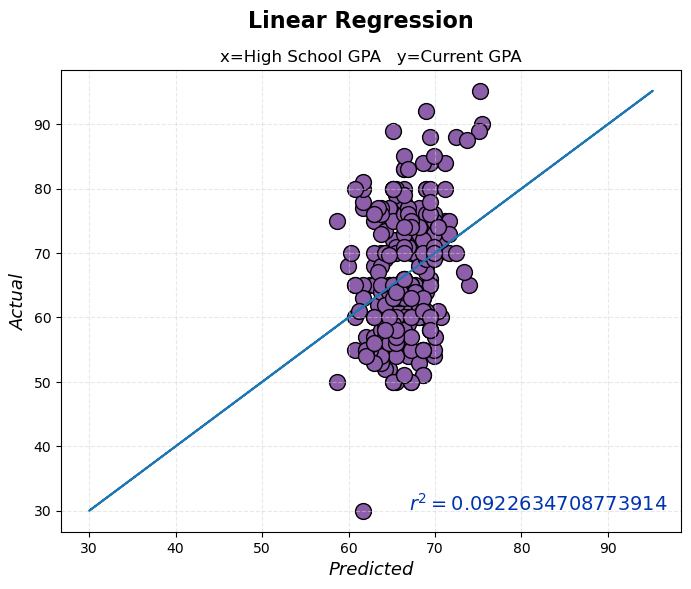

In [74]:
 #canvas
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#8d5eaa", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize
plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Linear Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA   y=Current GPA")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(r"$r^2 = {}$".format(r2_score(y_values, preds)), (67,30), fontsize=14, color="#0033b0")


print(f"The r-squared is: {r2value}")
plt.savefig("lin_predicted.png")
plt.show()

## High School GPA & Modules Failed vs Current GPA

In [75]:
#building the model for multi-linear regression
# in the scikit learn lib

x_values = df.loc[:, ["hs_gpa", "modules_failed"]]
y_values = df.current_gpa

lr = LinearRegression()
lr.fit(x_values,  y_values)

# LR equation
slope = lr.coef_[0]
slope2 = lr.coef_[1]
intercept = lr.intercept_
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(slope2,2)) + "x2 + " + str(round(intercept,2))


# predictions
preds = lr.predict(x_values)

print(line_eq)

# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

y = 0.37x + -2.99x2 + 40.05
The r-squared is: 0.2591577921040754


The r-squared is: 0.2591577921040754


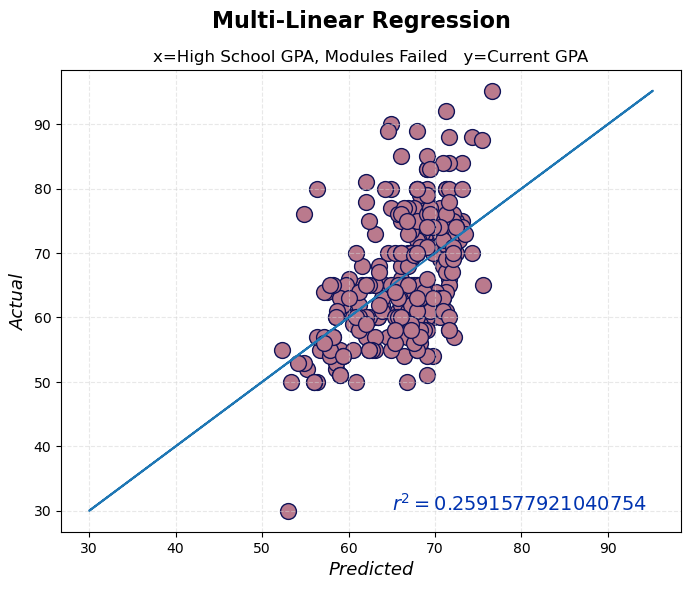

In [76]:
 #canvas
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#ba7a8d", edgecolor="#101358", s=130)

plt.plot(y_values, y_values) 

#customize
plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Multi-Linear Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Modules Failed   y=Current GPA")


plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(r"$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("multi_lin_predicted.png")
plt.show()

In [77]:
#multi-linear: predicting current gpa using high school GPA and # of modules failed 
Henry=[(85,0)]
lr.predict(Henry)

/Users/redhawkwax/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.66114723])

In [78]:
#current GPA strongest correlations 
abs(df.corr(numeric_only=True)["current_gpa"])

hs_gpa                0.303749
year_of_study         0.007036
current_gpa           1.000000
study_hours           0.029656
partying_frequency    0.031400
drinks_consumed       0.089603
classes_missed        0.115589
modules_failed        0.437896
Name: current_gpa, dtype: float64

In [79]:
#building and training model using Random Forest 
x_values = df.loc[:, ["hs_gpa", "modules_failed"]]
y_values = df.current_gpa

rf=RandomForestRegressor()
rf.fit(x_values,  y_values)


# predictions
preds = rf.predict(x_values)


# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

The r-squared is: 0.5614541104392256


The r-squared is: 0.5614541104392256


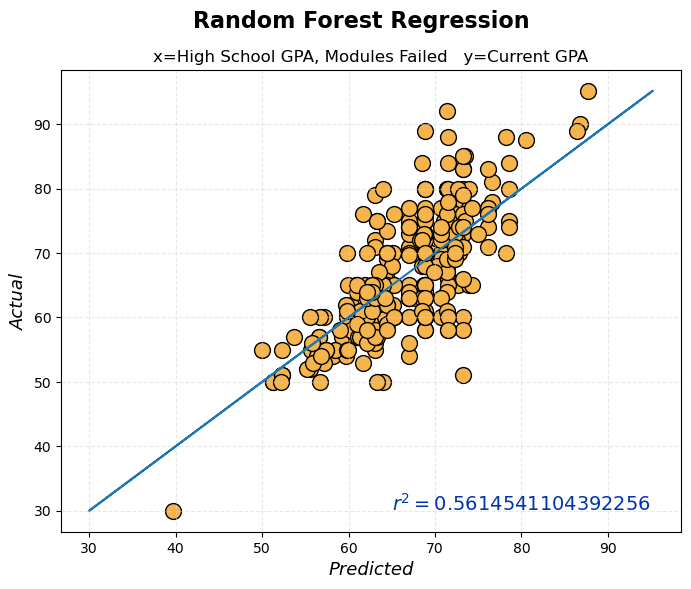

In [80]:
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#f6b44d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize
plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Random Forest Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Modules Failed   y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("random_predicted.png")
plt.show()

In [81]:
#random forest: predicting current gpa using high school GPA and # of modules failed 
Henry=[(85,0)]
rf.predict(Henry)

/Users/redhawkwax/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([71.47654255])

In [82]:
df.describe()

,hs_gpa,year_of_study,current_gpa,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,78.224161,1.838926,66.493289,2.489933,1.083893,2.412752,1.010067,0.885906
std,6.546669,0.837401,9.327853,1.269255,1.527418,1.189505,1.243122,1.281992
min,60.000000,1.000000,30.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,60.000000,1.000000,-1.000000,1.000000,0.000000,0.000000
50%,78.000000,2.000000,65.000000,3.000000,1.000000,3.000000,1.000000,0.000000
75%,83.000000,2.000000,73.875000,4.000000,2.000000,3.000000,2.000000,1.000000
max,99.000000,5.000000,95.200000,4.000000,4.000000,4.000000,4.000000,4.000000


## High School GPA & Modules Failed vs Current GPA

In [83]:
 # in the scikit learn lib

x_values = df.loc[:, ["hs_gpa", "classes_missed"]]
y_values = df.current_gpa

lr = LinearRegression()
lr.fit(x_values,  y_values)

# LR equation
slope = lr.coef_[0]
slope2 = lr.coef_[1]
intercept = lr.intercept_
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(slope2,2)) + "x2 + " + str(round(intercept,2))


# predictions
preds = lr.predict(x_values)

print(line_eq)

# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

y = 0.44x + -0.92x2 + 33.25
The r-squared is: 0.10735024705640472


The r-squared is: 0.10735024705640472


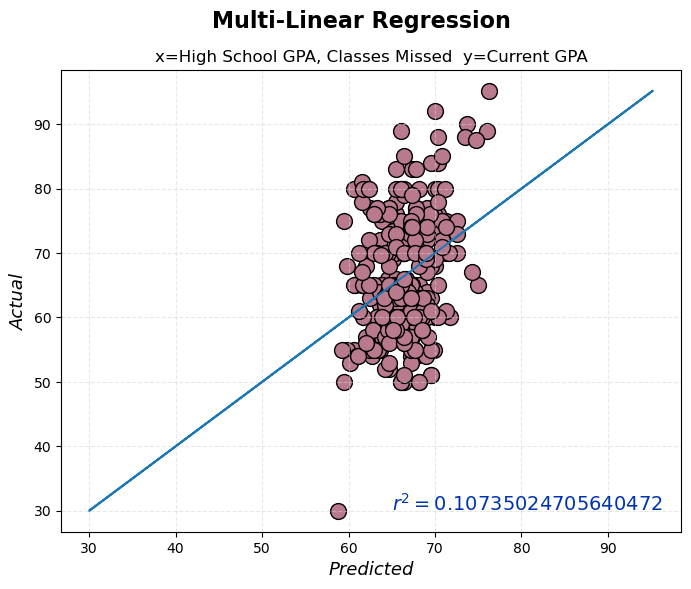

In [84]:
 #canvas
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#ba7a8d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize

plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Multi-Linear Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Classes Missed  y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("multi_classes.png")
plt.show()

In [85]:
x_values = df.loc[:, ["hs_gpa", "classes_missed"]]
y_values = df.current_gpa

rf=RandomForestRegressor()
rf.fit(x_values,  y_values)


# predictions
preds = rf.predict(x_values)


# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

The r-squared is: 0.44242619552416573


The r-squared is: 0.44242619552416573


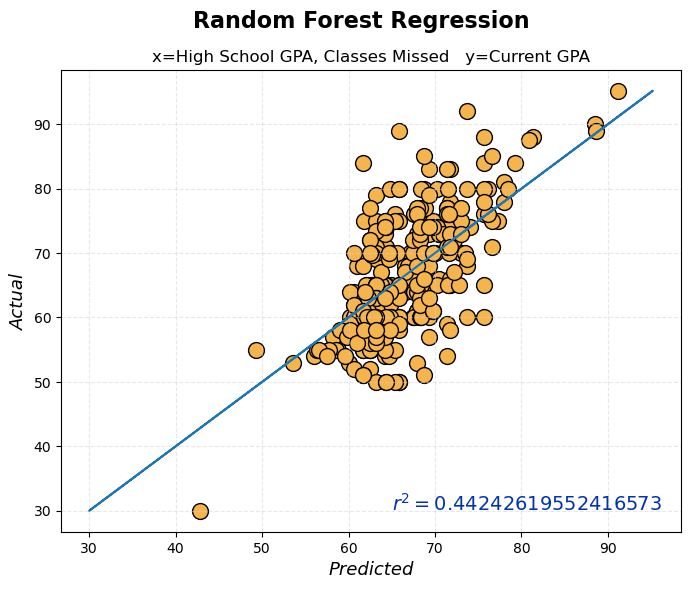

In [86]:
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#f6b44d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize
plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Random Forest Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Classes Missed   y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("random_classes.png")
plt.show()

In [87]:
#input:hs GPA & classes missed
Henry=[(85,2)]
rf.predict(Henry)

/Users/redhawkwax/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([61.76898124])

## High School GPA & Drinks Consumed vs Current GPA

In [88]:
 # in the scikit learn lib

x_values = df.loc[:, ["hs_gpa", "drinks_consumed"]]
y_values = df.current_gpa

lr = LinearRegression()
lr.fit(x_values,  y_values)

# LR equation
slope = lr.coef_[0]
slope2 = lr.coef_[1]
intercept = lr.intercept_
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(slope2,2)) + "x2 + " + str(round(intercept,2))


# predictions
preds = lr.predict(x_values)

print(line_eq)

# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

y = 0.42x + -0.44x2 + 34.4
The r-squared is: 0.09532112998081166


The r-squared is: 0.09532112998081166


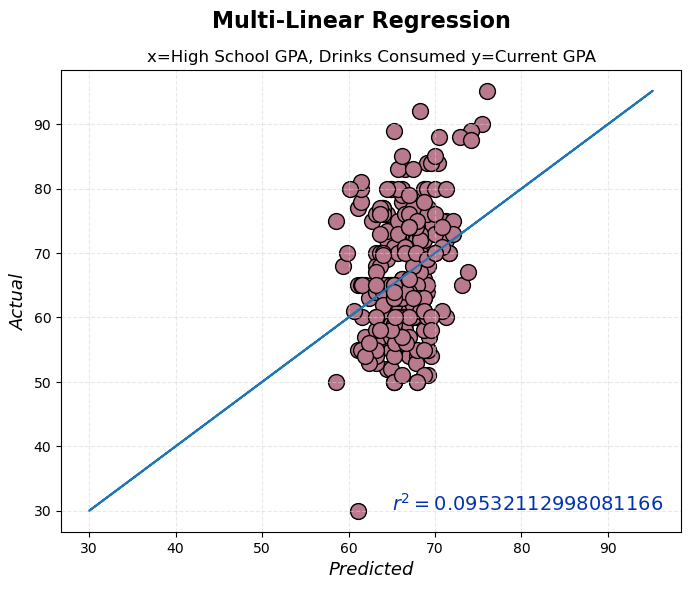

In [89]:
 #canvas
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#ba7a8d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize

plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Multi-Linear Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Drinks Consumed y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("multi_drinks.png")
plt.show()

In [90]:
x_values = df.loc[:, ["hs_gpa", "drinks_consumed"]]
y_values = df.current_gpa

rf=RandomForestRegressor()
rf.fit(x_values,  y_values)


# predictions
preds = rf.predict(x_values)


# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

The r-squared is: 0.4788334600038754


The r-squared is: 0.4788334600038754


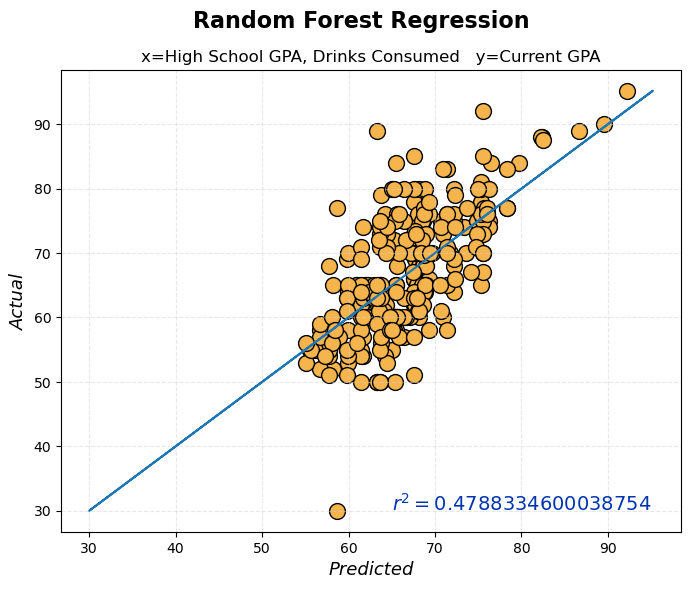

In [91]:
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#f6b44d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize
plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Random Forest Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Drinks Consumed   y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("random_drinks.png")
plt.show()

## High School GPA & Partying Frequency vs Current GPA

In [92]:
 # in the scikit learn lib

x_values = df.loc[:, ["hs_gpa", "partying_frequency"]]
y_values = df.current_gpa

lr = LinearRegression()
lr.fit(x_values,  y_values)

# LR equation
slope = lr.coef_[0]
slope2 = lr.coef_[1]
intercept = lr.intercept_
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(slope2,2)) + "x2 + " + str(round(intercept,2))


# predictions
preds = lr.predict(x_values)

print(line_eq)

# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

y = 0.44x + 0.35x2 + 31.71
The r-squared is: 0.09555603421493641


The r-squared is: 0.09555603421493641


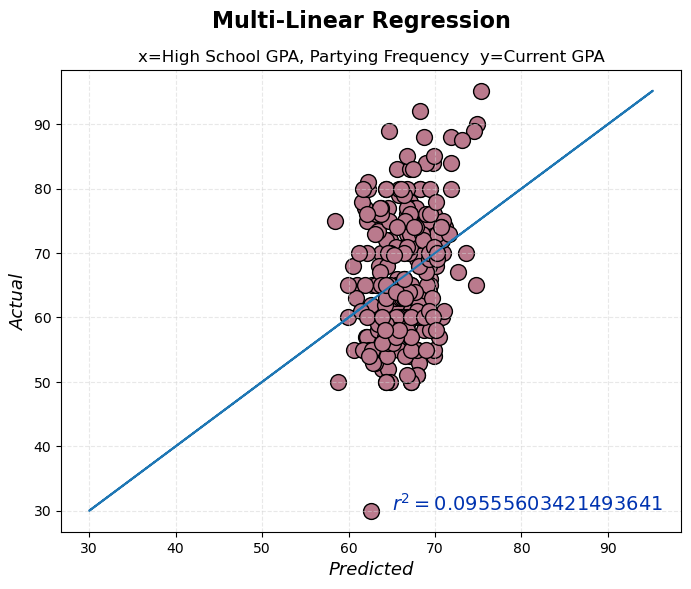

In [93]:
 #canvas
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#ba7a8d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize

plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Multi-Linear Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Partying Frequency  y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("multi_freq.png")
plt.show()

In [94]:
x_values = df.loc[:, ["hs_gpa", "partying_frequency"]]
y_values = df.current_gpa

rf=RandomForestRegressor()
rf.fit(x_values,  y_values)


# predictions
preds = rf.predict(x_values)


# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

The r-squared is: 0.4985584763092554


The r-squared is: 0.4985584763092554


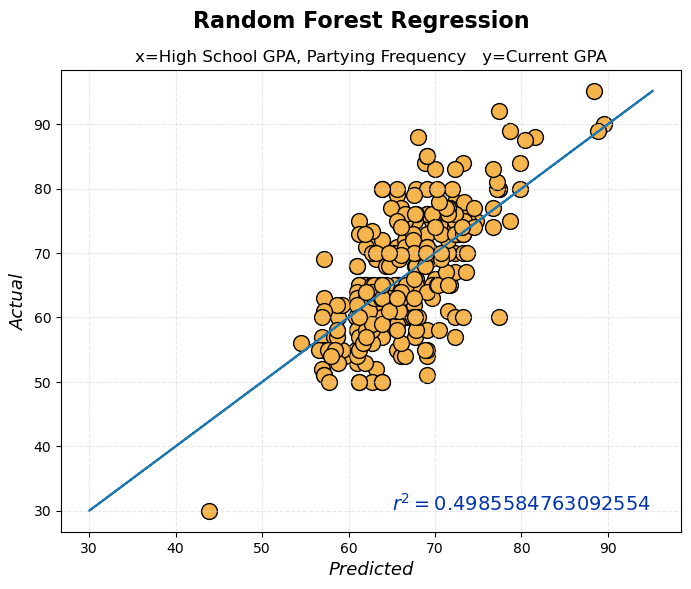

In [95]:
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#f6b44d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize
plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Random Forest Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Partying Frequency   y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("random_freq.png")
plt.show()

## High School GPA & Study Hours vs Current GPA

In [96]:
 # in the scikit learn lib

x_values = df.loc[:, ["hs_gpa", "study_hours"]]
y_values = df.current_gpa

lr = LinearRegression()
lr.fit(x_values,  y_values)

# LR equation
slope = lr.coef_[0]
slope2 = lr.coef_[1]
intercept = lr.intercept_
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(slope2,2)) + "x2 + " + str(round(intercept,2))


# predictions
preds = lr.predict(x_values)

print(line_eq)

# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

y = 0.45x + -0.38x2 + 32.1
The r-squared is: 0.0947648127965468


The r-squared is: 0.0947648127965468


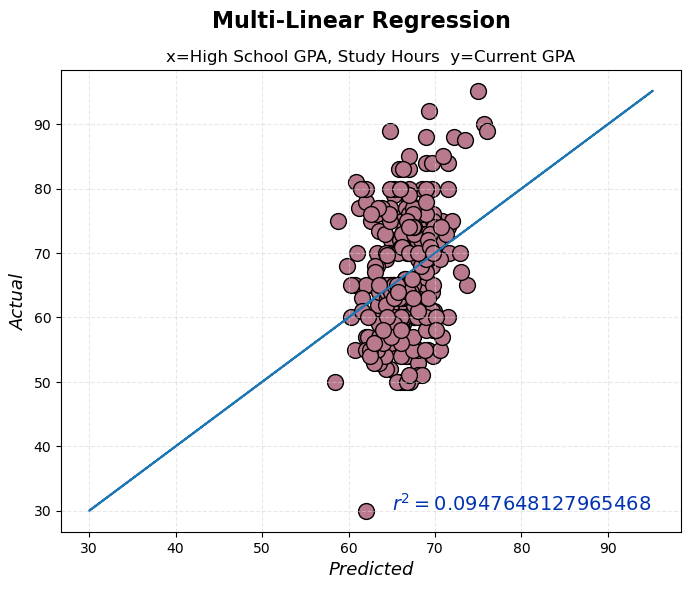

In [97]:
 #canvas
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#ba7a8d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize

plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Multi-Linear Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Study Hours  y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("multi_study.png")
plt.show()

In [98]:
x_values = df.loc[:, ["hs_gpa", "study_hours"]]
y_values = df.current_gpa

rf=RandomForestRegressor()
rf.fit(x_values,  y_values)


# predictions
preds = rf.predict(x_values)


# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

The r-squared is: 0.44470386397786177


The r-squared is: 0.44470386397786177


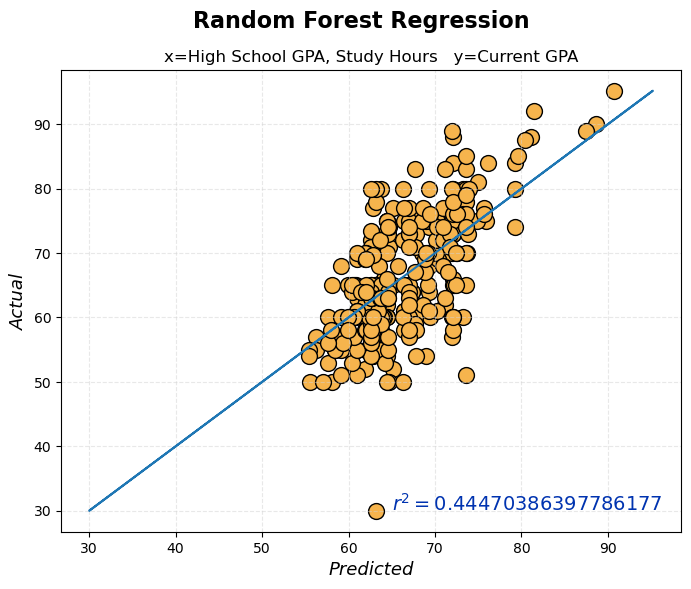

In [99]:
plt.figure(figsize=(8,6))

#plot predicted vs actual plot
plt.scatter(preds, y_values, facecolor="#f6b44d", edgecolor="black", s=130)

plt.plot(y_values, y_values) 

#customize
plt.xlabel("Predicted", fontsize=13, fontstyle="italic")
plt.ylabel("Actual", fontsize=13, fontstyle="italic")
plt.suptitle(f"Random Forest Regression", fontweight="bold", fontsize=16)
plt.title("x=High School GPA, Study Hours   y=Current GPA")

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate("$r^2 = {}$".format(r2_score(y_values, preds)), (65,30), fontsize=14, color="#0033b0")

print(f"The r-squared is: {r2value}")
plt.savefig("random_study.png")
plt.show()